In [3]:
import numpy as np

from openfast_toolbox.io import FASTOutputFile
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('./Output/linwei_wecsim.csv')
#df = pd.read_csv('./Output/linwei_wecsim.csv', usecols=['power', 'surge'])
print(df.columns)

Index(['time', 'surge', 'sway ', 'heave', 'roll', 'pitch', 'yaw', 'power'], dtype='object')


In [8]:
#file = FASTOutputFile('IEA-15-240-RWT-UMaineSemi-1.out')
#df = file.toDataFrame()
#print(df.columns[600:])  # 查看所有的列標籤
fileList = ['chen','pinsin','HAO_openfast','HAO_FASTFarm']
Output_wecsimlist = ['surge', 'heave',  'pitch','ten1',"ten2", "ten3" ,'power']
OutputList= ['PtfmSurge_[m]', 'PtfmHeave_[m]', 'PtfmPitch_[deg]', 'FAIRTEN1_[N]','FAIRTEN2_[N]', 'FAIRTEN3_[N]','GenPwr_[kW]']

In [9]:
def plotitem(i):
    for j in range(len(fileList)):  #plot for openfast .out file
        file = FASTOutputFile('./Output/'+fileList[j]+'.out')
        df = file.toDataFrame()
        time  = df['Time_[s]']
        item = df[OutputList[i]]
        plt.plot(time, item, label=fileList[j])

    if i ==0:
            df = pd.read_csv('./Output/linwei_wecsim.csv')
            time = df['time']
            item = df[Output_wecsimlist[i]]
            plt.plot(time, item, label='wecsim')
    elif i ==1: #change the setting of heave motion for WEC-sim result
        df = pd.read_csv('./Output/linwei_wecsim.csv')
        time = df['time']
        item = df['heave'] + 14.94
        plt.plot(time, item, label='wecsim')
    elif i ==2: #change WEC-sim output pitch[rad] to [deg]
        df = pd.read_csv('./Output/linwei_wecsim.csv')
        time = df['time']
        item = df['pitch'] * 180 / np.pi
        plt.plot(time, item, label='wecsim')
    elif i==6:  #Change WEC-sim output power[MW] to [kW]
        df = pd.read_csv('./Output/linwei_wecsim.csv')
        time = df['time']
        item = df['power'] * 1000
        print(item)
        plt.plot(time, item, label='wecsim')
    plt.xlabel('Time [s]')
    plt.ylabel(OutputList[i])
    plt.xlim([0,300])
    plt.legend()
    plt.show()
    plt.close()

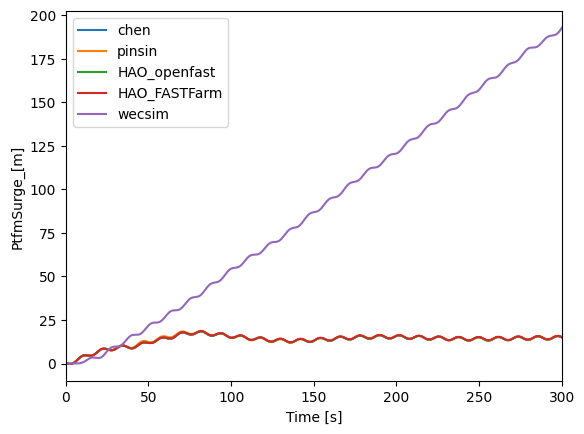

In [10]:
plotitem(0)

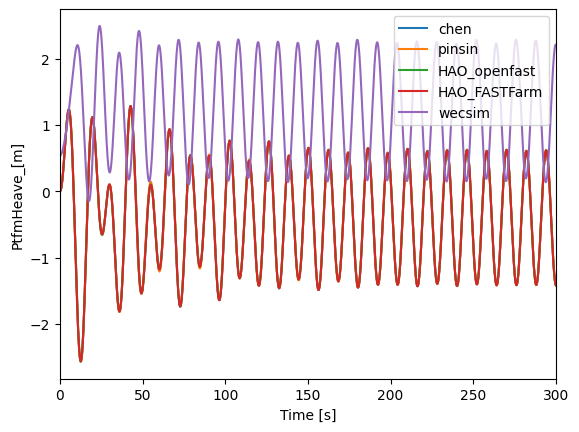

In [11]:
plotitem(1)

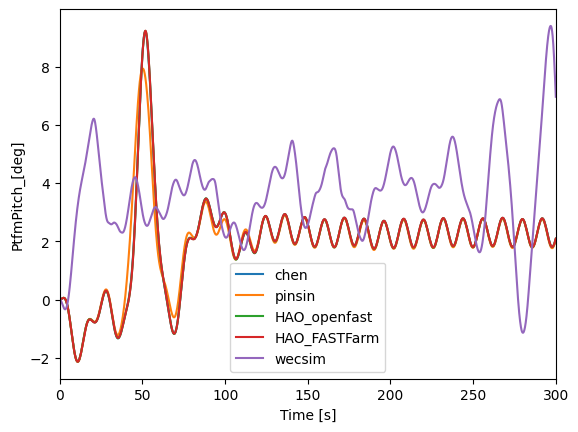

In [12]:
plotitem(2)

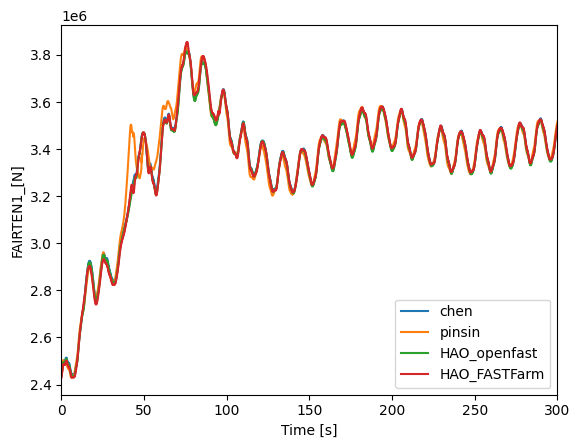

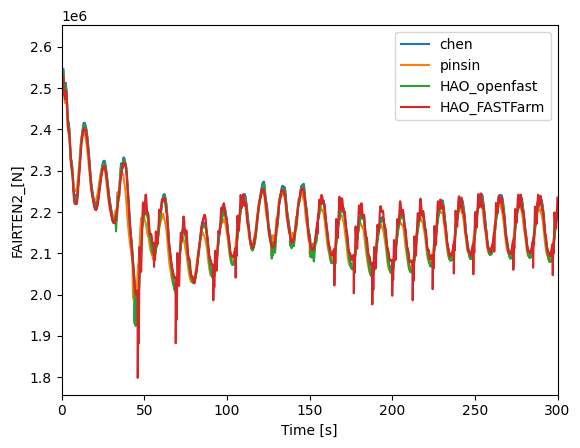

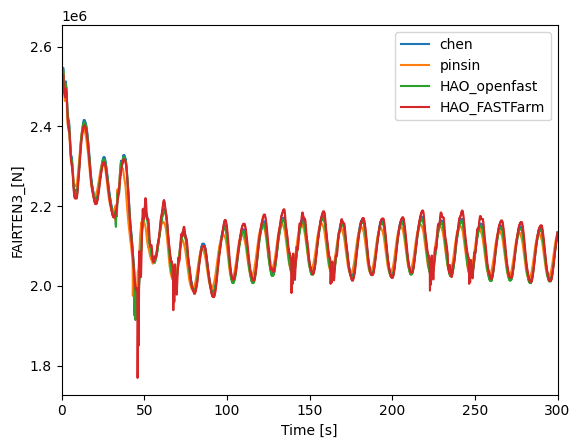

In [13]:
plotitem(3)
plotitem(4)
plotitem(5)

0            0.000000
1           12.936019
2           26.147115
3           39.616790
4           52.056993
             ...     
14996    12278.778510
14997    12297.991460
14998    12317.801730
14999    12338.016070
15000    12358.515220
Name: power, Length: 15001, dtype: float64


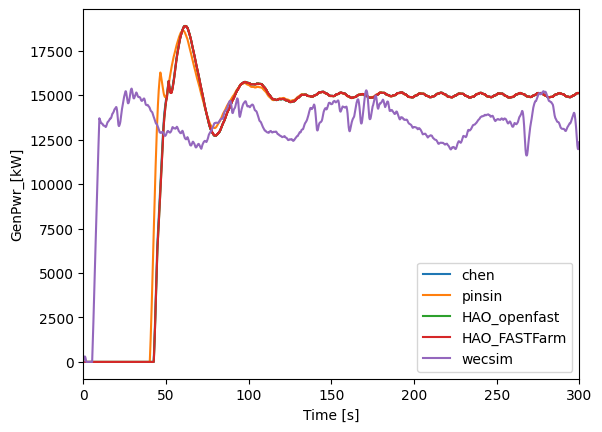

In [14]:
plotitem(6)